# Исследование данных о продажах игр
В моем распоряжении данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы.


Цели:
- выявить определяющие успешность игры закономерности
- сделать ставку на потенциально популярный продукт и спланировать рекламные кампании  на следующий год

Данные о продажах игр, я получу из файла '/datasets/games.csv'.О качестве данных ничего не известно, поэтому перед тем, как приступать к целяем исследования, понадобится обзор данных. Я проверю данные на ошибки, дубликаты и оценю их влияние на анализ. На этапе предобработки я постараюсь исправить все ошибки, которые необходимо устранить. 

Ход работы:
- Обзор данных
- Предобработка данных
- Исследовательский анализ
- Составления портрета пользователя каждого региона
- Формирование гипотез и их проверка
- Общий вывод


Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Изучу общую информацию о данных

In [2]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В ходе знакомства с данными заметила, что не все данные представлены в нужном типе данных, есть пропуски, названия колонок записаны без соблюдения правил.

### Предобработка данных

#### Подготовка данных


Приведу названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
print(data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


#### Изменение типов данных

- Год выпуска хранится в формате float,надо заменить на int, так как это целочисленная величина.
- Оценка пользователей хранится в формате object,надо заменить на float, так как это численная дробная величина.

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди данных об оценке пользователей есть такое значение - 'tbd' - 'To Be Determined', то есть 'Будет определено'. Значит эти игры вышли совсем недавно и о них еще нет оценки. Значит, их можно удалить.

In [7]:
data['user_score'] = data.loc[data['user_score'] != 'tbd','user_score']
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [8]:
data = data.dropna(subset=['year_of_release','name'])

In [9]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Работа с пропусками в данных

In [10]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [11]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Пропуски обнаружены в столбцах:
- Name (2 пропуска) - т.к. это менее 5%, эти данные можно удалить
- Year_of_Release (2% пропусков) - т.к. это менее 5%, эти данные можно удалить
- Critic_Score (51% пропусков) - бОльшая часть данных отсутствует  
- User_Score (40% пропусков)    
- Rating (40% пропусков) 

Возникли серьезные пропуски в оценке критиков, пользовательской оценке и рейтинге ESRB. Они могли возникнуть из-за того, что игру еще не успели оценить или игра очень старая(тогда еще не проводили анализ)

In [12]:
data = data.dropna(subset=['year_of_release','name']) 
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [13]:
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)

Добавлю новый столбец с суммой всех продаж. Обозначу стобец 'sum_sales'

In [14]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38


### Исследовательский анализ данных

Посмотрю сколько игр выпускалось в разные годы.

In [15]:
count_by_year = data.groupby('year_of_release')['name'].agg(['count'])
count_by_year

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:xlabel='year_of_release'>

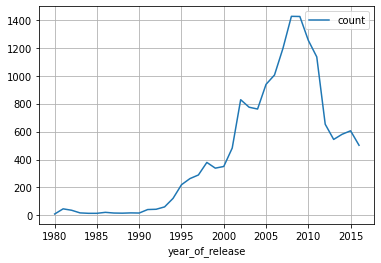

In [16]:
count_by_year.plot(grid = True)

Мы видим, что с 1980 года по 2009 год количество выпускаемых игр увеличивалось. Однако,  с 2009 года количество пошло на убывание. Я считаю, важно рассмотреть "хороший" и "плохой" периоды, чтобы увидеть разницу -  c 2005 по 2016.

Посмотрю,как менялись продажи по платформам.Выберу платформы с наибольшим суммарными продажами и построю график распределения по годам.

In [17]:
sum_sales_by_platform = data.groupby('platform')['sum_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False)
sum_sales_by_platform

,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<AxesSubplot:xlabel='platform'>

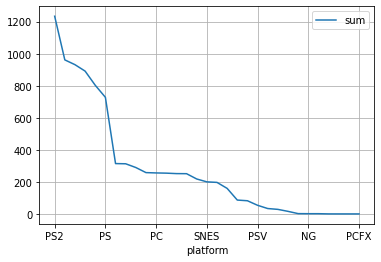

In [18]:
sum_sales_by_platform.plot(grid = True)

Самыми "успешными" платформами стали:

- PS2	1233.56
- X360	961.24
- PS3	931.34

<AxesSubplot:xlabel='year_of_release'>

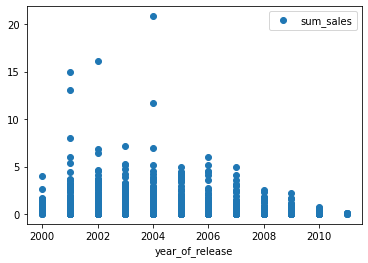

In [19]:
data_ps2 = data.query('platform == "PS2"')
data_ps2.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

<AxesSubplot:xlabel='year_of_release'>

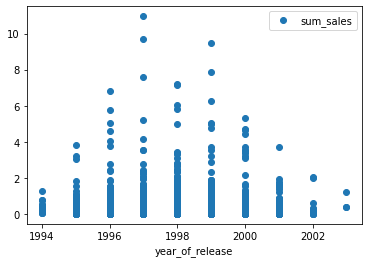

In [20]:
data_ps = data.query('platform == "PS"')
data_ps.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

<AxesSubplot:xlabel='year_of_release'>

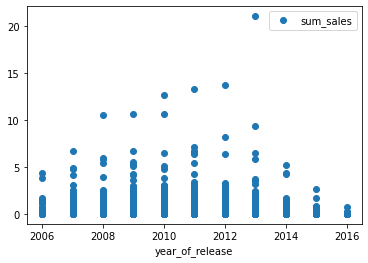

In [21]:
data_ps3 = data.query('platform == "PS3"')
data_ps3.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

<AxesSubplot:xlabel='year_of_release'>

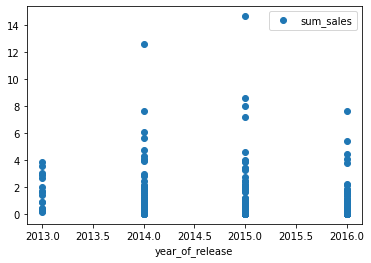

In [22]:
data_ps4 = data.query('platform == "PS4"')
data_ps4.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

<AxesSubplot:xlabel='year_of_release'>

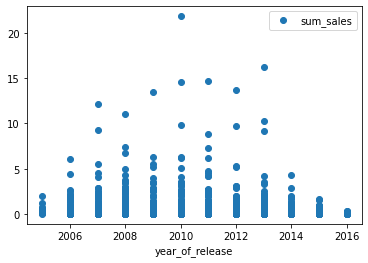

In [23]:
data_X360 = data.query('platform == "X360"')
data_X360.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

Построив графики, видно, что платформы живут около 10 лет, но популярны всего 5-6 лет. Далее им на смену приходят новые, более свежие модели. Например, рассмотрим ps. Ps1 было популярно до 2002 года, а в 2002 вышла новая версия и ps1 стало все менее и менее популярно. Также произошло и с ps2,ps3,ps4.

Учитывая, что платформы популярны всего 5-6 лет, сделаем срез именно за этот промежуток. С 2010 по 2016 год.

In [24]:
data_2010_2016 = data.query('year_of_release >= 2010 and year_of_release <= 2016')
data_2010_2016_groupby_platform = data_2010_2016.groupby('platform')['sum_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False)
data_2010_2016_groupby_platform

,sum
platform,
PS3,587.74
X360,550.41
PS4,314.14
3DS,257.81
Wii,222.97
XOne,159.32
DS,123.75
PC,121.96
WiiU,82.19


<AxesSubplot:xlabel='year_of_release'>

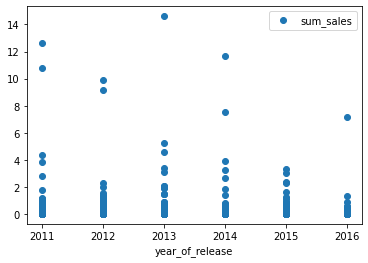

In [25]:
data_3DS = data.query('platform == "3DS"')
data_3DS.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

<AxesSubplot:xlabel='year_of_release'>

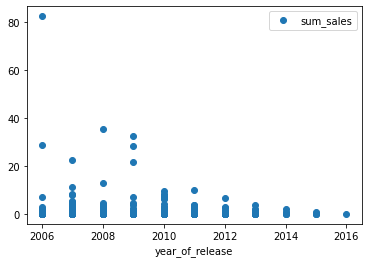

In [26]:
data_Wii = data.query('platform == "Wii"')
data_Wii.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

<AxesSubplot:xlabel='year_of_release'>

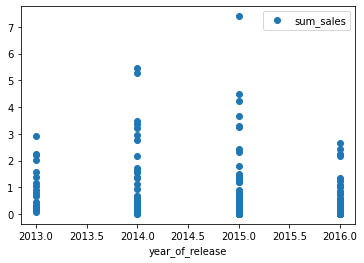

In [27]:
data_XOne = data.query('platform == "XOne"')
data_XOne.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

<AxesSubplot:xlabel='year_of_release'>

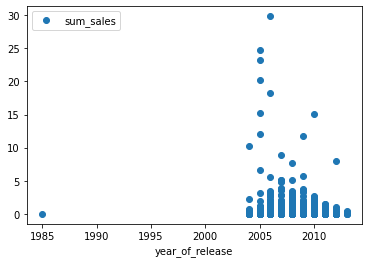

In [28]:
data_DS = data.query('platform == "DS"')
data_DS.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

<AxesSubplot:xlabel='year_of_release'>

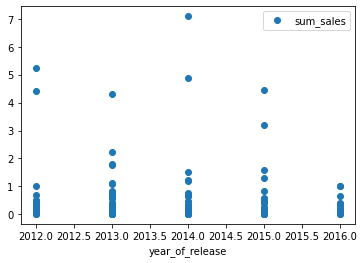

In [29]:
data_WiiU = data.query('platform == "WiiU"')
data_WiiU.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

<AxesSubplot:xlabel='year_of_release'>

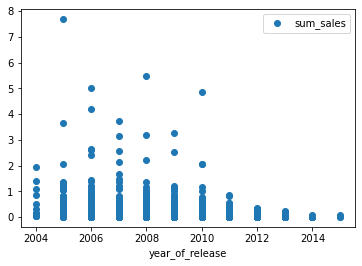

In [30]:
data_PSP = data.query('platform == "PSP"')
data_PSP.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

<AxesSubplot:xlabel='year_of_release'>

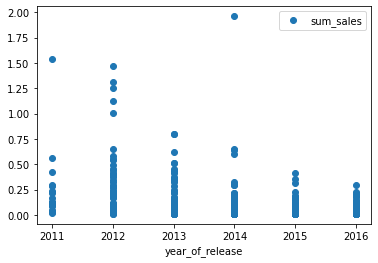

In [31]:
data_PSV = data.query('platform == "PSV"')
data_PSV.plot(x = 'year_of_release', y = 'sum_sales', style = 'o')

- По графику ps3,ps2 и ps(рассмотрены ранее) видно, что они теряют свою популярность, им на смену приходит ps4.Он вышел в 2014 году, а значит еще несколько лет будет популярен.
- X360 существует с 2005 года и тоже уже устарел. 
- 3DS, Wii,Ds,WiiU,PSP,PSV - теряют свою популярность.
- XOne - набирает популярность


Можно сделать вывод, что наиболее популярны в 2017 году будут платформы: XOne и ps4

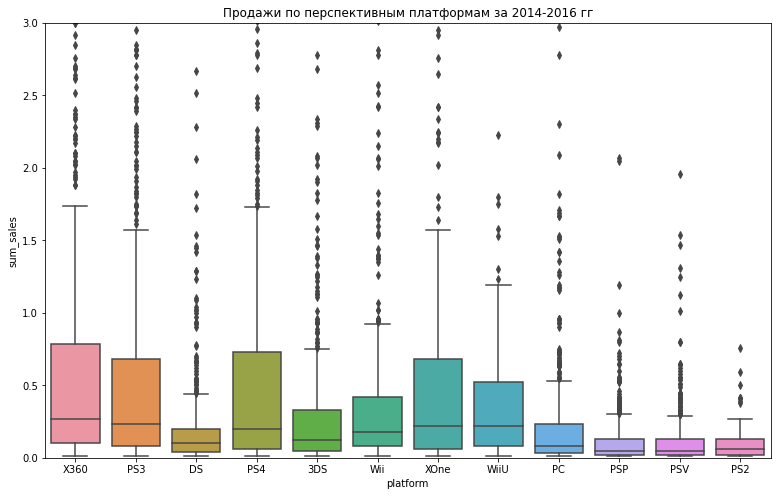

In [32]:
import matplotlib.pyplot as plt
import seaborn  as sns

plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_2010_2016, y = data_2010_2016['sum_sales'], x=data_2010_2016['platform']).set(title = 'Продажи по перспективным платформам за 2014-2016 гг', ylim=(0, 3)))

plt.show()

In [33]:
#import seaborn as sns
#plt.figure(figsize=(13, 8))
#(sns.boxplot(data = Название датасета, y = 'столбец суммарных продаж', x='столбец платформ')
    #.set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

#plt.show()

Самыми используемыми являются X360,PS3,PS4,XOne

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

In [34]:
platforms = ['X360','PS3','PS4','XOne']
for platform in platforms:
    print(platform)
    print('оценки игроков')
    print('Всего: ', data_2010_2016.loc[data_2010_2016['platform'] == platform,'user_score'].count())
    print('Хорошие данные : ', (data_2010_2016.loc[data_2010_2016['platform'] == platform,'user_score'].count() - data_2010_2016.loc[data_2010_2016['platform'] == platform,'user_score'].isna().sum())/data_2010_2016.loc[data_2010_2016['platform'] == platform,'user_score'].count() * 100,'%')
    print('оценки экспертов')
    print('Всего: ', data_2010_2016.loc[data_2010_2016['platform'] == platform,'critic_score'].count())
    print('Хорошие данные : ', (data_2010_2016.loc[data_2010_2016['platform'] == platform,'critic_score'].count() - data_2010_2016.loc[data_2010_2016['platform'] == platform,'critic_score'].isna().sum())/data_2010_2016.loc[data_2010_2016['platform'] == platform,'critic_score'].count() * 100,'%')
    print()

X360
оценки игроков
Всего:  680
Хорошие данные :  100.0 %
оценки экспертов
Всего:  680
Хорошие данные :  100.0 %

PS3
оценки игроков
Всего:  889
Хорошие данные :  100.0 %
оценки экспертов
Всего:  889
Хорошие данные :  100.0 %

PS4
оценки игроков
Всего:  392
Хорошие данные :  100.0 %
оценки экспертов
Всего:  392
Хорошие данные :  100.0 %

XOne
оценки игроков
Всего:  247
Хорошие данные :  100.0 %
оценки экспертов
Всего:  247
Хорошие данные :  100.0 %



Меньше всего пропусков у платформы XOne, возьмем ее для анализа

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

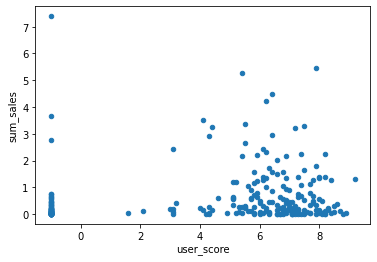

In [35]:
data_XOne.plot(x= 'user_score', y='sum_sales', kind='scatter')

In [36]:
data_XOne['user_score'].corr(data_XOne['sum_sales'])

0.12171152458232884

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

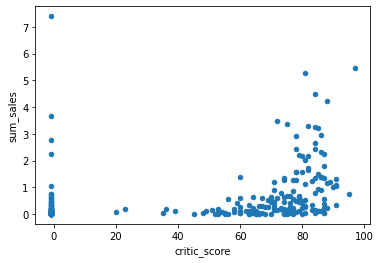

In [37]:
data_XOne.plot(x= 'critic_score', y='sum_sales', kind='scatter')

In [38]:
data_XOne['critic_score'].corr(data_XOne['sum_sales'])

0.27378217261702115

Судя по графику, чем выше оценка критиков, тем выше продажи, однако, коэффициент корреляции показывает, что связь между этими данными очень слабая.

Рассмотрим игры по жанрам

In [39]:
data_2010_2016['genre'].unique()

array(['Misc', 'Action', 'Role-Playing', 'Shooter', 'Racing', 'Platform',
       'Simulation', 'Sports', 'Fighting', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

<AxesSubplot:xlabel='genre'>

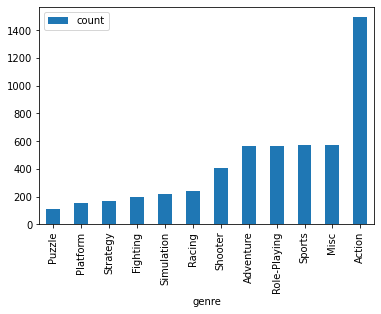

In [40]:
name_by_genre = data_2010_2016.groupby('genre')['name'].agg(['count'])
name_by_genre.sort_values(by = 'count').plot(y='count', kind='bar')

- Больше всего выпускают игр жанра action
- На одном уровне находится количество игр жанров: sports, role-playing, adventure
- Меньше всего игр жанра puzzle

,median,mean
genre,,
Adventure,0.030,0.108348
Puzzle,0.070,0.180702
Strategy,0.080,0.210824
Simulation,0.100,0.330645
Misc,0.130,0.407222
Action,0.140,0.450227
Role-Playing,0.150,0.555070
Racing,0.170,0.517637
Fighting,0.180,0.410000


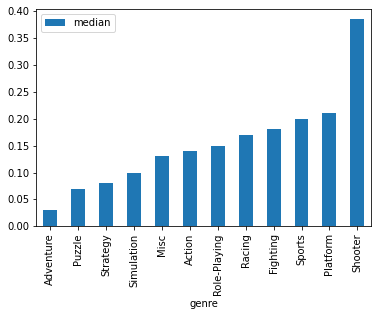

In [41]:
name_by_genre = data_2010_2016.groupby('genre')['sum_sales'].agg(['median','mean'])
name_by_genre.sort_values(by = 'median').plot(y='median', kind='bar')
name_by_genre.sort_values(by = 'median')

- На первом месте по прибыльности - Shooter
- Наименее прибыльный жанр - Adventure

### Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5)

<AxesSubplot:ylabel='sum'>

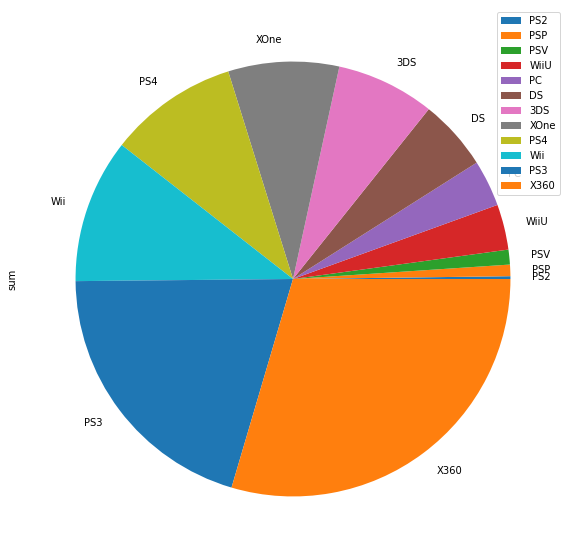

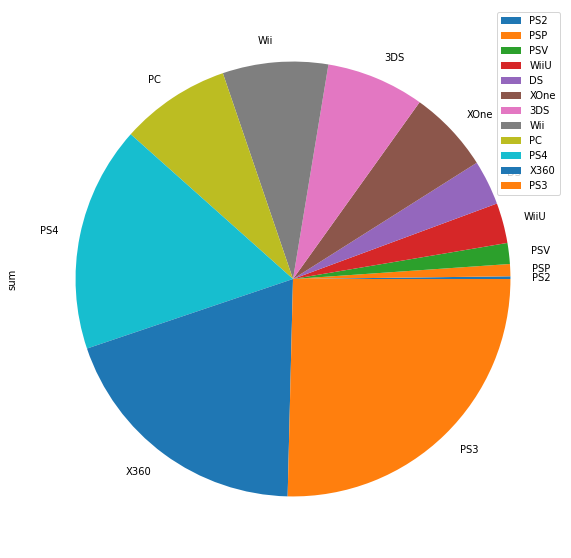

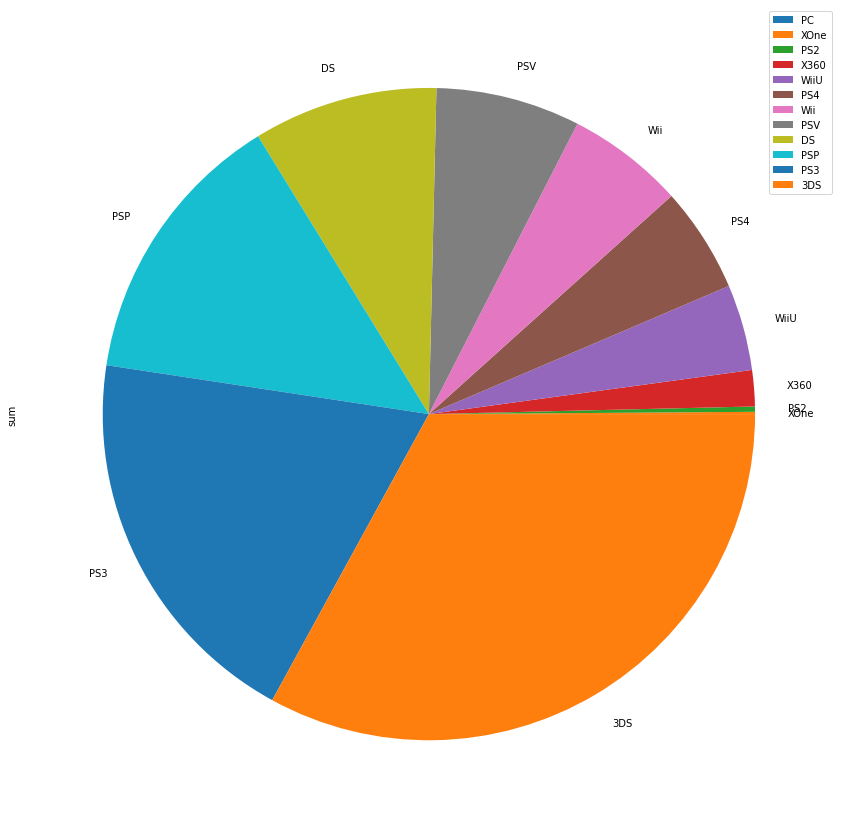

In [42]:
data_2010_2016.groupby('platform')['na_sales'].agg(['sum']).sort_values(by = 'sum').plot(y = 'sum',kind = 'pie',figsize=(10, 10))
data_2010_2016.groupby('platform')['eu_sales'].agg(['sum']).sort_values(by = 'sum').plot(y = 'sum',kind = 'pie',figsize=(10, 10))
data_2010_2016.groupby('platform')['jp_sales'].agg(['sum']).sort_values(by = 'sum').plot(y = 'sum',kind = 'pie',figsize=(15, 15))


In [43]:
data_2010_2016.groupby('platform')['na_sales'].agg(['sum']).sort_values(by = 'sum')

,sum
platform,
PS2,2.32
PSP,9.65
PSV,12.47
WiiU,38.10
PC,39.07
DS,59.66
3DS,82.65
XOne,93.12
PS4,108.74


In [44]:
data_2010_2016['na_sales'].sum()

1130.41

In [45]:
data_2010_2016.groupby('platform')['eu_sales'].agg(['sum']).sort_values(by = 'sum')

,sum
platform,
PS2,1.67
PSP,7.59
PSV,13.07
WiiU,25.13
DS,28.06
XOne,51.59
3DS,61.27
Wii,65.91
PC,68.82


In [46]:
data_2010_2016['eu_sales'].sum()

841.21

In [47]:
data_2010_2016.groupby('platform')['jp_sales'].agg(['sum']).sort_values(by = 'sum')

,sum
platform,
PC,0.00
XOne,0.34
PS2,0.80
X360,5.46
WiiU,13.01
PS4,15.96
Wii,17.75
PSV,21.84
DS,27.90


In [48]:
data_2010_2016['jp_sales'].sum()

305.14

Топ 5 платформ для Северной Америки:
- X360 (29,6%)
- PS3 (20,3%)
- Wii (10,7%)
- PS4 (9,6%)
- XOne (8,2%)

Топ 5 платформ в Европе:
- PS3 (25,4%)
- X360 (19,4%) 
- PS4 (16,8%)
- PС (8,2%)
- Wii (7,8%)

Топ 5 платформ в Японии:
- 3DS (32,9%)    
- PS3 (19,4%)
- PSP (13,8%)
- DS (9,1%)  
- PSV (7,1%)

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные жанры (топ-5)

<AxesSubplot:xlabel='genre'>

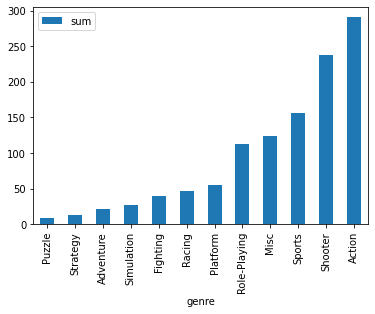

In [49]:
na_by_genre = data_2010_2016.groupby('genre')['na_sales'].agg(['sum'])
na_by_genre.sort_values(by = 'sum').plot(y='sum', kind='bar')

<AxesSubplot:xlabel='genre'>

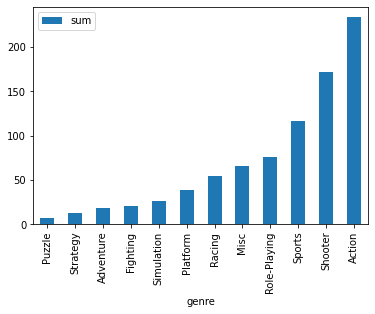

In [50]:
eu_by_genre = data_2010_2016.groupby('genre')['eu_sales'].agg(['sum'])
eu_by_genre.sort_values(by = 'sum').plot(y='sum', kind='bar')

<AxesSubplot:xlabel='genre'>

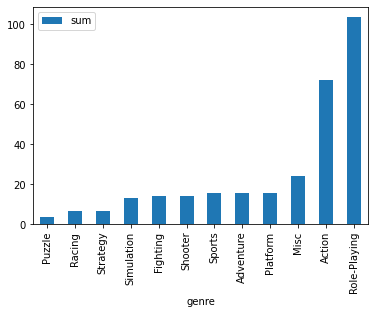

In [51]:
jp_by_genre = data_2010_2016.groupby('genre')['jp_sales'].agg(['sum'])
jp_by_genre.sort_values(by = 'sum').plot(y='sum', kind='bar')

Топ 5 жанров в Северной Америки:
- Action
- Shooter
- Sports
- Misc
- Role-Playing

Топ 5 жанров в Европе:
- Action
- Shooter
- Sports
- Role-Playing
- Misc

Топ 5 жанров в Японии:
- Role-Playing
- Action
- Misc
- Platform
- Adventure



Япония сильно отличается от Северной Америки и Европы по набору топа жанров.

### Проверка гипотез

H0 Средние пользовательские рейтинги Xbox и PC равны

H1 Средние пользовательские рейтинги Xbox и PC не равны

Так как в данных о рейтинге есть пропуски, то мы будем брать не генеральную совокупность, а выборку.

In [61]:
data_xbox = data.copy()
data_xbox = data_xbox.query('platform == "XB"')
data_pc = data.copy()
data_pc = data_pc.query('platform == "PC"')

from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(data_xbox['user_score'],data_pc['user_score'],equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10123426582368222
Не получилось отвергнуть нулевую гипотезу


Ho Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


H1 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [60]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(data.loc[data['genre'] == 'Action','user_score'],data.loc[data['genre'] == 'Sports','user_score'],equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 7.595997985225105e-09
Отвергаем нулевую гипотезу


### Общий вывод

В ходе исследования было выявлено, что наиболее популярными платформами для компьютерных игр в 2017 году станут XOne и PS4. Однако, в Японии эти платформы не находятся в топе, поэтому для них ситуация может быть иной.


По прибыльности на первом месте жанр - shooter, а наименее прибыльный - adventure. Они входят в топ жанров Северной Америки и Европы, но в Японии популярны совершенно другие жанры. 


Больше всего выпускают игр жанра action, я считаю, что в 2017 году можно выпускать меньше игр данного жанра, а упор сделать на shooter. Потому что он более прибыльный.

На продаваемость игры отзывы экспертов и игроков не влияют.